# Installing packages

The code is from https://michielstock.github.io/posts/2017/2017-11-5-OptimalTransport/

In [ ]:
import jax
import jax.numpy as jnp
from jax import jit
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

from sklearn.datasets import make_circles
from scipy.spatial import distance_matrix

# JAX implementation of sinkhorn algorithm

In [ ]:
@jit
def scale_cols_and_rows(P):
    P *= (r / P.sum(1)).reshape((-1, 1))
    P *= (c / P.sum(0)).reshape((1, -1))
    return P

In [ ]:
def sinkhorn_knopp_jax(M, r, c, lam, niter=100000):
    M = jnp.array(M)
    n, m = M.shape
    P = jnp.exp(-lam * M)
    P /= P.sum()
    # normalize this matrix
    for i in trange(niter):
        P = scale_cols_and_rows(P)
    return P, jnp.sum(P * M)


def sinkhorn_knopp_np(M, r, c, lam, niter=100000):
    n, m = M.shape
    P = np.exp(-lam * M)
    P /= P.sum()
    # normalize this matrix
    for i in trange(niter):
        P *= r / P.sum(1)
        P *= c / P.sum(0)
    return P, np.sum(P * M)

In [ ]:
n_samples = 10000
X, y = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, shuffle=False)
X1 = X[y == 0]
X2 = X[y == 1]

n, m = len(X1), len(X2)

# Comparing numpy and JAX

In [ ]:
r = np.ones(n) / n
c = np.ones(m) / m

M = jnp.array(distance_matrix(X1, X2))

P, d = sinkhorn_knopp_jax(M, r, c, lam=30, niter=1000)

In [ ]:
P, d = sinkhorn_knopp_np(M, r, c, lam=30, niter=1000)

# Visualisation of sinkorn algorithm
**Warning**: Only taking a subset of points to map otherwise the visualisation will look cluttered on matplotlib

Text(0.5, 1.0, 'Optimal matching')

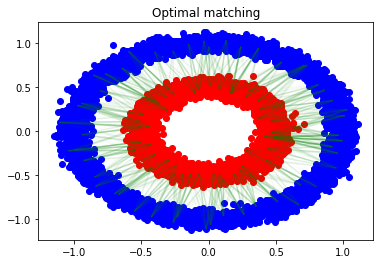

In [ ]:
sampling_factor = 100
plt.scatter(X1[:, 0], X1[:, 1], color="blue")
plt.scatter(X2[:, 0], X2[:, 1], color="red")
for i in trange(0, n, sampling_factor):
    for j in range(0, m, sampling_factor):
        plt.plot([X1[i, 0], X2[j, 0]], [X1[i, 1], X2[j, 1]], color="green", alpha=float(P[i, j] * n) * sampling_factor)
plt.title("Optimal matching")